In [127]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

import warnings; warnings.filterwarnings('ignore')

In [41]:
v = pd.read_csv('volunteer_opportunities.csv')
print(v.shape)
v.head(3)

(665, 35)


,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,amsl,amsl_unit,org_title,org_content_id,addresses_count,locality,region,postalcode,primary_loc,display_url,recurrence_type,hours,created_date,last_modified_date,start_date_date,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,NaN,NaN,Center For NYC Neighborhoods,4426,1,NaN,NY,NaN,NaN,/opportunities/4996,onetime,0,January 13 2011,June 23 2011,July 30 2011,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,NaN,NaN,Bpeace,37026,1,"5 22nd St\nNew York, NY 10010\n(40.74053152272...",NY,10010.0,NaN,/opportunities/5008,onetime,0,January 14 2011,January 25 2011,February 01 2011,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,NaN,NaN,Street Project,3001,1,NaN,NY,10026.0,NaN,/opportunities/5016,onetime,0,January 19 2011,January 21 2011,January 29 2011,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
v = v[['content_id', 'hits', 'recurrence_type']]

In [43]:
v.recurrence_type.value_counts()

ongoing    510
onetime    155
Name: recurrence_type, dtype: int64

# .query vs .loc

1 마이크로초 [µs] = 0.001 밀리초 [ms]

In [44]:
%%timeit
v.query(("recurrence_type=='ongoing'"))

1.03 ms ± 70.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [79]:
print(f"{1.03+70.4*0.001}ms")

1.1004ms


In [46]:
%%timeit
v.loc[v['recurrence_type']=='ongoing']

270 µs ± 3.41 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [80]:
print(f"{270*0.001+3.41*0.001}ms")

0.27341000000000004ms


일반적으로 .query가 .loc보다 속도 더 느림

# for loop vs apply

<AxesSubplot:xlabel='hits'>

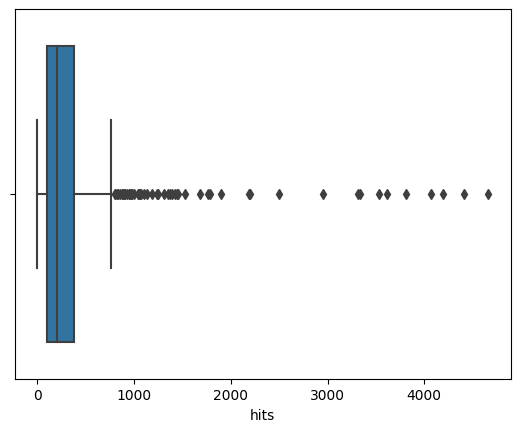

In [48]:
sns.boxplot(v['hits'])

In [49]:
v.head(3)

,content_id,hits,recurrence_type
0,37004,737,onetime
1,37036,22,onetime
2,37143,62,onetime


In [78]:
%%timeit

# 1. for loop
v['hits_grp_1'] = np.nan

for i, j in enumerate(v['hits']):
    if j <= 500:
        v.iloc[i, 3] = 1
    elif (j > 500) and (j <= 1000):
        v.iloc[i, 3] = 2
    elif (j > 1000) and (j <= 2000):
        v.iloc[i, 3] = 3
    else:
        v.iloc[i, 3] = 4

41.8 ms ± 658 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [81]:
print(f"{41.8+658*0.001}ms")

42.458ms


In [72]:
%%timeit

# 2. .apply

def hits_apply(hits):
    if hits <= 500:
        return 1
    elif (hits > 500) and (hits <= 1000):
        return 2
    elif (hits > 1000) and (hits <= 2000):
        return 3
    else:
        return 4
        
v['hits_grp_2'] = v['hits'].apply(hits_apply)

447 µs ± 8.42 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [82]:
print(f"{447*0.001+8.42*0.001}ms")

0.45542ms


In [87]:
v.sample(5)

,content_id,hits,recurrence_type,hits_grp_1,hits_grp_2
642,51541,230,onetime,1.0,1
149,40993,38,ongoing,1.0,1
316,38634,601,ongoing,2.0,2
384,36928,2953,ongoing,4.0,4
211,38474,590,ongoing,2.0,2


# Thread

2가지 이상의 함수를 동시에 동작

In [117]:
import threading

In [118]:
test = v[['content_id', 'hits']].copy()

In [119]:
test.head()

,content_id,hits
0,37004,737
1,37036,22
2,37143,62
3,37237,14
4,37425,31


In [130]:
# 일반적인 함수 선언 및 실행

def hits_for():
    for i, j in enumerate(test['hits']):
        # i가 200의 배수일 때마다 출력
        if i % 200 == 0:
            print(f"hits_for 함수 200배수 지점의 i: {i}")
        if j <= 500:
            test.iloc[i, 2] = 1
        elif (j > 500) and (j <= 1000):
            test.iloc[i, 2] = 2
        elif (j > 1000) and (j <= 2000):
            test.iloc[i, 2] = 3
        else:
            test.iloc[i, 2] = 4
            
def test_print():
    for i in range(600):
        # i가 300의 배수일 때마다 출력
        if i % 300 == 0:
            print(f"test_print 함수 300배수 지점의 i: {i}")
            
if __name__ == '__main__':
    hits_for()
    test_print()

hits_for 함수 200배수 지점의 i: 0
hits_for 함수 200배수 지점의 i: 200
hits_for 함수 200배수 지점의 i: 400
hits_for 함수 200배수 지점의 i: 600
test_print 함수 300배수 지점의 i: 0
test_print 함수 300배수 지점의 i: 300


In [138]:
# Thread 활용

def hits_for():
    for i, j in enumerate(test['hits']):
        # i가 200의 배수일 때마다 출력
        if i % 200 == 0:
            print(f"hits_for 함수 200배수 지점의 i: {i}")
        if j <= 500:
            test.iloc[i, 2] = 1
        elif (j > 500) and (j <= 1000):
            test.iloc[i, 2] = 2
        elif (j > 1000) and (j <= 2000):
            test.iloc[i, 2] = 3
        else:
            test.iloc[i, 2] = 4
            
    
# 병렬 처리 확인 위한 함수
def test_print():
    for i in range(600):
        # i가 300의 배수일 때마다 출력
        if i % 300 == 0:
            print(f"test_print 함수 300배수 지점의 i: {i}")

def hits_apply_thread():
    thread = threading.Thread(target=hits_for)
    thread.start()
        
if __name__ == '__main__':
    test['hits_grp'] = np.nan
    hits_apply_thread()
    test_print()

hits_for 함수 200배수 지점의 i: 0
test_print 함수 300배수 지점의 i: 0
test_print 함수 300배수 지점의 i: 300
hits_for 함수 200배수 지점의 i: 200
hits_for 함수 200배수 지점의 i: 400
hits_for 함수 200배수 지점의 i: 600


In [126]:
test.head()

,content_id,hits,hits_grp
0,37004,737,2.0
1,37036,22,1.0
2,37143,62,1.0
3,37237,14,1.0
4,37425,31,1.0
